## 使用tushare在线获取个股交易历史数据。
#### 主要内容
    1. 使用tushare获取在线的数据。
    2. 熟悉Pandas的基本操作，参考help。
    3. 使用matplotlib简单地绘图显示。


#### Tushare说明
- Tushare详细接口请参考 http://tushare.org/trading.html#id2。
- 参数说明：
```
    code：股票代码，即6位数字代码，或者指数代码（sh=上证指数 sz=深圳成指 hs300=沪深300指数 sz50=上证50 zxb=中小板 cyb=创业板）
    start：开始日期，格式YYYY-MM-DD
    end：结束日期，格式YYYY-MM-DD
    ktype：数据类型，D=日k线 W=周 M=月 5=5分钟 15=15分钟 30=30分钟 60=60分钟，默认为D
    retry_count：当网络异常后重试次数，默认为3
    pause:重试时停顿秒数，默认为0
```


- 返回值说明：
```
    date：日期
    open：开盘价
    high：最高价
    close：收盘价
    low：最低价
    volume：成交量
    price_change：价格变动
    p_change：涨跌幅
    ma5：5日均价
    ma10：10日均价
    ma20:20日均价
    v_ma5:5日均量
    v_ma10:10日均量
    v_ma20:20日均量
    turnover:换手率[注：指数无此项]
```


- 其他:
```
    ts.get_hist_data('600848', ktype='W') #获取周k线数据
    ts.get_hist_data('600848', ktype='M') #获取月k线数据
    ts.get_hist_data('600848', ktype='5') #获取5分钟k线数据
    ts.get_hist_data('600848', ktype='15') #获取15分钟k线数据
    ts.get_hist_data('600848', ktype='30') #获取30分钟k线数据
    ts.get_hist_data('600848', ktype='60') #获取60分钟k线数据
    ts.get_hist_data('sh'）#获取上证指数k线数据，其它参数与个股一致，下同
    ts.get_hist_data('sz'）#获取深圳成指k线数据
    ts.get_hist_data('hs300'）#获取沪深300指数k线数据
    ts.get_hist_data('sz50'）#获取上证50指数k线数据
    ts.get_hist_data('zxb'）#获取中小板指数k线数据
    ts.get_hist_data('cyb'）#获取创业板指数k线数据
```


In [3]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = ts.get_hist_data('300036', start='2018-07-01', end='2018-07-30') #一次性获取全部日k线数据

显示数据。

In [5]:
df

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2018-07-23,24.00,24.63,24.50,23.64,394998.97,1.14,4.88,22.130,21.352,20.767,242604.41,228566.07,220282.24
2018-07-20,21.27,23.36,23.36,20.58,285217.94,2.12,9.98,21.416,21.006,20.479,203027.90,211702.43,208217.12
2018-07-19,20.31,21.53,21.24,20.08,237180.05,0.84,4.12,20.804,20.744,20.248,179878.59,214353.52,200045.24
2018-07-18,21.01,21.11,20.40,20.40,120305.32,-0.75,-3.55,20.672,20.590,20.068,182143.04,210405.44,192780.61
2018-07-17,20.99,21.16,21.15,19.98,175319.77,0.22,1.05,20.566,20.501,19.947,209358.56,216870.16,191965.90
2018-07-16,20.21,21.59,20.93,20.15,197116.41,0.63,3.10,20.574,20.457,19.744,214527.74,219714.13,188143.40
2018-07-13,20.57,21.00,20.30,19.92,169471.41,-0.28,-1.36,20.596,20.361,19.602,220376.96,215256.89,183077.62
2018-07-12,19.80,21.34,20.58,19.67,248502.31,0.71,3.57,20.684,20.370,19.516,248828.44,222424.89,180589.74
2018-07-11,20.43,20.67,19.87,19.42,256382.91,-1.32,-6.23,20.508,20.258,19.405,238667.83,212641.17,171870.55


In [8]:
df.columns

Index(['open', 'high', 'close', 'low', 'volume', 'price_change', 'p_change',
       'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20'],
      dtype='object')

转置数据。

In [6]:
df.T

date,2018-07-23,2018-07-20,2018-07-19,2018-07-18,2018-07-17,2018-07-16,2018-07-13,2018-07-12,2018-07-11,2018-07-10,2018-07-09,2018-07-06,2018-07-05,2018-07-04,2018-07-03,2018-07-02
open,24.000,21.270,20.310,21.010,20.990,20.210,20.570,19.800,20.430,20.880,20.690,19.470,19.700,20.600,20.040,20.380
high,24.630,23.360,21.530,21.110,21.160,21.590,21.000,21.340,20.670,21.670,21.120,21.670,20.850,20.610,20.960,20.450
close,24.500,23.360,21.240,20.400,21.150,20.930,20.300,20.580,19.870,21.190,21.040,20.740,19.700,19.510,20.710,19.970
low,23.640,20.580,20.080,20.400,19.980,20.150,19.920,19.670,19.420,20.460,20.420,19.340,19.300,19.230,19.600,19.680
volume,394998.970,285217.940,237180.050,120305.320,175319.770,197116.410,169471.410,248502.310,256382.910,201165.640,226362.550,311728.810,197699.220,184952.520,203759.550,152543.950
price_change,1.140,2.120,0.840,-0.750,0.220,0.630,-0.280,0.710,-1.320,0.150,0.300,1.040,0.190,-1.200,0.740,-0.420
p_change,4.880,9.980,4.120,-3.550,1.050,3.100,-1.360,3.570,-6.230,0.710,1.450,5.280,0.970,-5.790,3.710,-2.060
ma5,22.130,21.416,20.804,20.672,20.566,20.574,20.596,20.684,20.508,20.436,20.340,20.126,20.056,20.008,20.118,20.022
ma10,21.352,21.006,20.744,20.590,20.501,20.457,20.361,20.370,20.258,20.277,20.181,19.951,19.751,19.545,19.393,19.031
ma20,20.767,20.479,20.248,20.068,19.947,19.744,19.602,19.516,19.405,19.334,19.190,19.084,18.983,18.950,18.923,18.768


In [9]:
df.head(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2018-07-23,24.00,24.63,24.50,23.64,394998.97,1.14,4.88,22.130,21.352,20.767,242604.41,228566.07,220282.24
2018-07-20,21.27,23.36,23.36,20.58,285217.94,2.12,9.98,21.416,21.006,20.479,203027.90,211702.43,208217.12
2018-07-19,20.31,21.53,21.24,20.08,237180.05,0.84,4.12,20.804,20.744,20.248,179878.59,214353.52,200045.24
2018-07-18,21.01,21.11,20.40,20.40,120305.32,-0.75,-3.55,20.672,20.590,20.068,182143.04,210405.44,192780.61
2018-07-17,20.99,21.16,21.15,19.98,175319.77,0.22,1.05,20.566,20.501,19.947,209358.56,216870.16,191965.90
2018-07-16,20.21,21.59,20.93,20.15,197116.41,0.63,3.10,20.574,20.457,19.744,214527.74,219714.13,188143.40
2018-07-13,20.57,21.00,20.30,19.92,169471.41,-0.28,-1.36,20.596,20.361,19.602,220376.96,215256.89,183077.62
2018-07-12,19.80,21.34,20.58,19.67,248502.31,0.71,3.57,20.684,20.370,19.516,248828.44,222424.89,180589.74
2018-07-11,20.43,20.67,19.87,19.42,256382.91,-1.32,-6.23,20.508,20.258,19.405,238667.83,212641.17,171870.55


In [8]:
df.tail(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2018-07-13,20.57,21.00,20.30,19.92,169471.41,-0.28,-1.36,20.596,20.361,19.602,220376.96,215256.89,183077.62
2018-07-12,19.80,21.34,20.58,19.67,248502.31,0.71,3.57,20.684,20.370,19.516,248828.44,222424.89,180589.74
2018-07-11,20.43,20.67,19.87,19.42,256382.91,-1.32,-6.23,20.508,20.258,19.405,238667.83,212641.17,171870.55
2018-07-10,20.88,21.67,21.19,20.46,201165.64,0.15,0.71,20.436,20.277,19.334,224381.75,205605.51,162626.66
2018-07-09,20.69,21.12,21.04,20.42,226362.55,0.30,1.45,20.340,20.181,19.190,224900.53,211998.41,158078.63
2018-07-06,19.47,21.67,20.74,19.34,311728.81,1.04,5.28,20.126,19.951,19.084,210136.81,204731.81,150349.86
2018-07-05,19.70,20.85,19.70,19.30,197699.22,0.19,0.97,20.056,19.751,18.983,196021.34,185736.96,137993.03
2018-07-04,20.60,20.61,19.51,19.23,184952.52,-1.20,-5.79,20.008,19.545,18.950,186614.52,175155.78,133121.67
2018-07-03,20.04,20.96,20.71,19.60,203759.55,0.74,3.71,20.118,19.393,18.923,186829.27,167061.65,132099.17


In [41]:
df.dtypes

open            float64
high            float64
close           float64
low             float64
volume          float64
price_change    float64
p_change        float64
ma5             float64
ma10            float64
ma20            float64
v_ma5           float64
v_ma10          float64
v_ma20          float64
dtype: object

In [23]:
df.index

Index(['2018-07-23', '2018-07-20', '2018-07-19', '2018-07-18', '2018-07-17',
       '2018-07-16', '2018-07-13', '2018-07-12', '2018-07-11', '2018-07-10',
       '2018-07-09', '2018-07-06', '2018-07-05', '2018-07-04', '2018-07-03',
       '2018-07-02'],
      dtype='object', name='date')

In [42]:
df.values

array([[ 2.4000000e+01,  2.4630000e+01,  2.4500000e+01,  2.3640000e+01,
         3.9499897e+05,  1.1400000e+00,  4.8800000e+00,  2.2130000e+01,
         2.1352000e+01,  2.0767000e+01,  2.4260441e+05,  2.2856607e+05,
         2.2028224e+05],
       [ 2.1270000e+01,  2.3360000e+01,  2.3360000e+01,  2.0580000e+01,
         2.8521794e+05,  2.1200000e+00,  9.9800000e+00,  2.1416000e+01,
         2.1006000e+01,  2.0479000e+01,  2.0302790e+05,  2.1170243e+05,
         2.0821712e+05],
       [ 2.0310000e+01,  2.1530000e+01,  2.1240000e+01,  2.0080000e+01,
         2.3718005e+05,  8.4000000e-01,  4.1200000e+00,  2.0804000e+01,
         2.0744000e+01,  2.0248000e+01,  1.7987859e+05,  2.1435352e+05,
         2.0004524e+05],
       [ 2.1010000e+01,  2.1110000e+01,  2.0400000e+01,  2.0400000e+01,
         1.2030532e+05, -7.5000000e-01, -3.5500000e+00,  2.0672000e+01,
         2.0590000e+01,  2.0068000e+01,  1.8214304e+05,  2.1040544e+05,
         1.9278061e+05],
       [ 2.0990000e+01,  2.1160000e+

In [44]:
df.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,20.646875,21.482500,20.949375,20.116875,222669.208125,0.256875,1.239375,20.566000,20.235500,19.563000,210462.123125,203674.843750,171111.852500
std,1.024218,1.074048,1.299418,1.038504,67110.126874,0.900768,4.285577,0.552836,0.596444,0.599813,21720.301506,20990.790536,29189.834901
min,19.470000,20.450000,19.510000,19.230000,120305.320000,-1.320000,-6.230000,20.008000,19.031000,18.768000,179878.590000,156572.680000,126548.200000
25%,20.167500,20.932500,20.217500,19.555000,182544.332500,-0.315000,-1.535000,20.124000,19.901000,19.058750,193723.322500,199983.097500,147260.652500
50%,20.500000,21.140000,20.725000,19.950000,202462.595000,0.260000,1.250000,20.537000,20.319000,19.460500,209747.685000,211850.420000,176230.145000
75%,20.907500,21.610000,21.160000,20.405000,250472.460000,0.765000,3.812500,20.675000,20.523250,19.977250,224511.445000,215660.207500,192169.577500
max,24.000000,24.630000,24.500000,23.640000,394998.970000,2.120000,9.980000,22.130000,21.352000,20.767000,248828.440000,228566.070000,220282.240000


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,16.0,20.646875,1.024218,19.470,20.16750,20.5000,20.90750,24.000
high,16.0,21.482500,1.074048,20.450,20.93250,21.1400,21.61000,24.630
close,16.0,20.949375,1.299418,19.510,20.21750,20.7250,21.16000,24.500
low,16.0,20.116875,1.038504,19.230,19.55500,19.9500,20.40500,23.640
volume,16.0,222669.208125,67110.126874,120305.320,182544.33250,202462.5950,250472.46000,394998.970
price_change,16.0,0.256875,0.900768,-1.320,-0.31500,0.2600,0.76500,2.120
p_change,16.0,1.239375,4.285577,-6.230,-1.53500,1.2500,3.81250,9.980
ma5,16.0,20.566000,0.552836,20.008,20.12400,20.5370,20.67500,22.130
ma10,16.0,20.235500,0.596444,19.031,19.90100,20.3190,20.52325,21.352
ma20,16.0,19.563000,0.599813,18.768,19.05875,19.4605,19.97725,20.767


In [43]:
df["open"].head()

date
2018-07-23    24.00
2018-07-20    21.27
2018-07-19    20.31
2018-07-18    21.01
2018-07-17    20.99
Name: open, dtype: float64

In [14]:
df.sort_index(ascending=True).T

date,2018-07-02,2018-07-03,2018-07-04,2018-07-05,2018-07-06,2018-07-09,2018-07-10,2018-07-11,2018-07-12,2018-07-13,2018-07-16,2018-07-17,2018-07-18,2018-07-19,2018-07-20,2018-07-23
open,20.380,20.040,20.600,19.700,19.470,20.690,20.880,20.430,19.800,20.570,20.210,20.990,21.010,20.310,21.270,24.000
high,20.450,20.960,20.610,20.850,21.670,21.120,21.670,20.670,21.340,21.000,21.590,21.160,21.110,21.530,23.360,24.630
close,19.970,20.710,19.510,19.700,20.740,21.040,21.190,19.870,20.580,20.300,20.930,21.150,20.400,21.240,23.360,24.500
low,19.680,19.600,19.230,19.300,19.340,20.420,20.460,19.420,19.670,19.920,20.150,19.980,20.400,20.080,20.580,23.640
volume,152543.950,203759.550,184952.520,197699.220,311728.810,226362.550,201165.640,256382.910,248502.310,169471.410,197116.410,175319.770,120305.320,237180.050,285217.940,394998.970
price_change,-0.420,0.740,-1.200,0.190,1.040,0.300,0.150,-1.320,0.710,-0.280,0.630,0.220,-0.750,0.840,2.120,1.140
p_change,-2.060,3.710,-5.790,0.970,5.280,1.450,0.710,-6.230,3.570,-1.360,3.100,1.050,-3.550,4.120,9.980,4.880
ma5,20.022,20.118,20.008,20.056,20.126,20.340,20.436,20.508,20.684,20.596,20.574,20.566,20.672,20.804,21.416,22.130
ma10,19.031,19.393,19.545,19.751,19.951,20.181,20.277,20.258,20.370,20.361,20.457,20.501,20.590,20.744,21.006,21.352
ma20,18.768,18.923,18.950,18.983,19.084,19.190,19.334,19.405,19.516,19.602,19.744,19.947,20.068,20.248,20.479,20.767


In [25]:
df2 = pd.DataFrame(df,columns=("open","close","high")).sort_index(ascending=True)

In [26]:
df2

,open,close,high
date,,,
2018-07-02,20.38,19.97,20.45
2018-07-03,20.04,20.71,20.96
2018-07-04,20.60,19.51,20.61
2018-07-05,19.70,19.70,20.85
2018-07-06,19.47,20.74,21.67
2018-07-09,20.69,21.04,21.12
2018-07-10,20.88,21.19,21.67
2018-07-11,20.43,19.87,20.67
2018-07-12,19.80,20.58,21.34


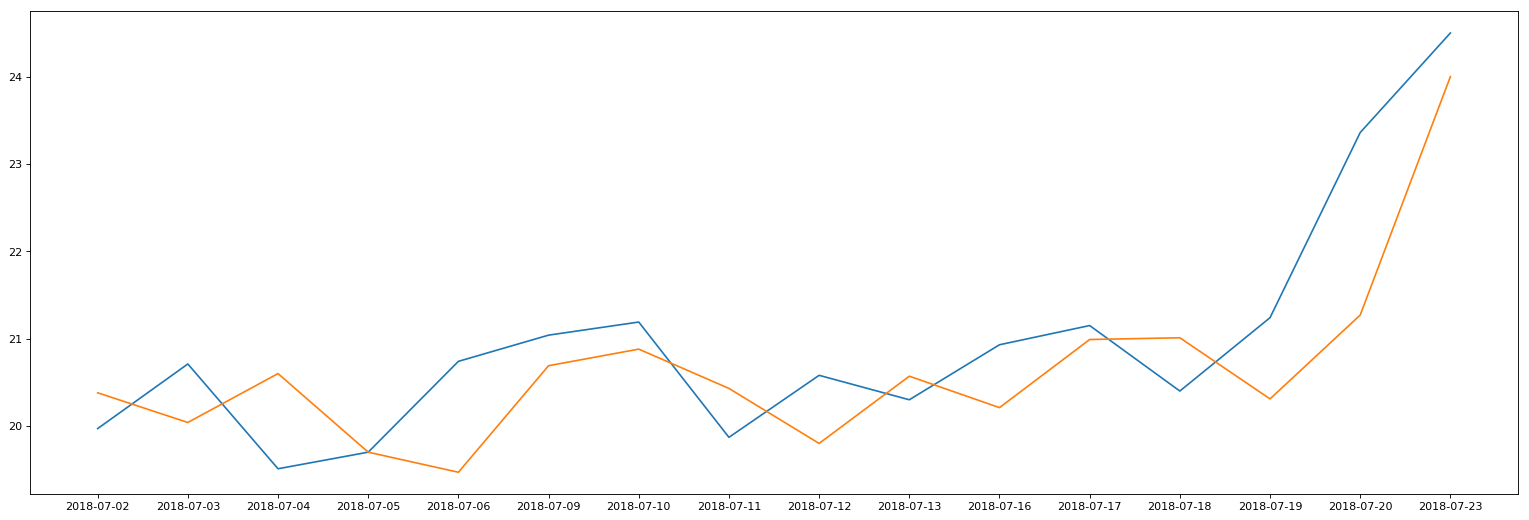

In [27]:
#将绘画框进行对象化
fig=plt.figure(figsize=(24,8), dpi=80)
p1=fig.add_subplot(1,1,1)
p1.plot(df2.index,df2['close'])
p1.plot(df2.index,df2['open'])
plt.show()